<a href="https://colab.research.google.com/github/thanhdangg/PCA_face_detection/blob/main/LAB1_Face_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import zipfile
import numpy as np

faces = {}
with zipfile.ZipFile("/content/drive/MyDrive/Colab Notebooks/Machine Learning/archive.zip") as facezip:
    for filename in facezip.namelist():
        if not filename.endswith(".pgm"):
            continue
        with facezip.open(filename) as image:
            faces[filename] = cv2.imdecode(np.frombuffer(image.read(), np.uint8), cv2.IMREAD_GRAYSCALE)

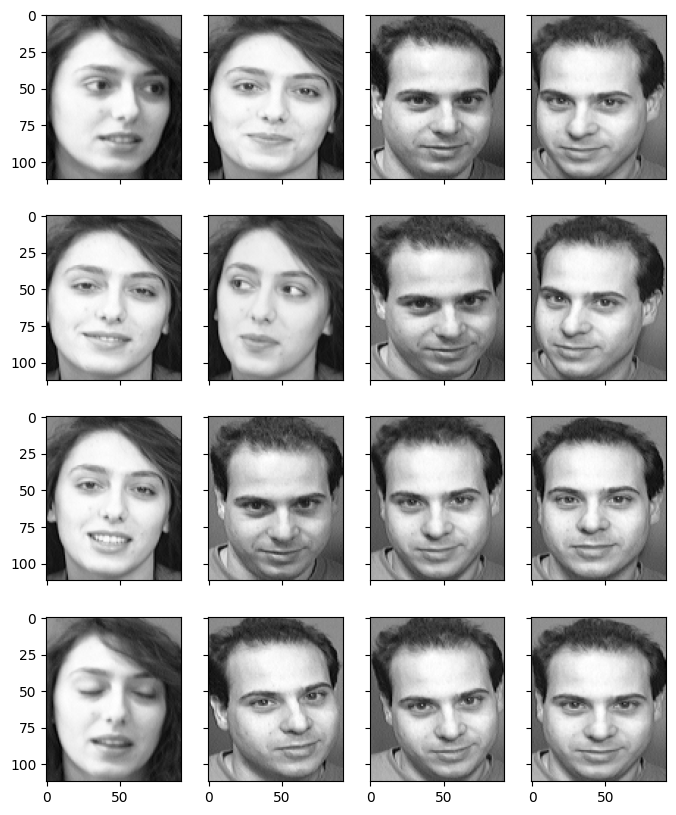

In [2]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(4,4,sharex=True,sharey=True,figsize=(8,10))
faceimages = list(faces.values())[-16:]
for i in range(16):
    axes[i%4][i//4].imshow(faceimages[i], cmap="gray")
plt.show()

In [3]:
faceshape = list(faces.values())[0].shape
print("Face image shape:", faceshape)

Face image shape: (112, 92)


In [4]:
print(list(faces.keys())[:5])

['s1/1.pgm', 's1/10.pgm', 's1/2.pgm', 's1/3.pgm', 's1/4.pgm']


In [5]:
classes = set(filename.split("/")[0] for filename in faces.keys())
print("Number of classes:", len(classes))
print("Number of pictures:", len(faces))

Number of classes: 40
Number of pictures: 400


In [6]:
facematrix = []
facelabel = []
for key,val in faces.items():
    if key.startswith("s40/"):
        continue # this is our test set
    if key == "s39/10.pgm":
        continue # this is our test set
    facematrix.append(val.flatten())
    facelabel.append(key.split("/")[0])

facematrix = np.array(facematrix)

In [7]:
facematrix

array([[ 48,  49,  45, ...,  47,  46,  46],
       [ 34,  34,  33, ...,  37,  40,  33],
       [ 60,  60,  62, ...,  32,  34,  34],
       ...,
       [112, 109, 116, ...,  93,  88,  92],
       [111, 114, 112, ...,  88,  86,  92],
       [110, 112, 113, ...,  92,  87,  90]], dtype=uint8)

In [8]:
facematrix.shape

(389, 10304)

In [9]:
# Tinh gia tri trung binh mau
mean_face  = np.mean(facematrix, axis=0)
mean_face

array([84.58097686, 84.59640103, 84.88946015, ..., 77.18251928,
       76.07712082, 75.44473008])

In [10]:
mean_face.shape

(10304,)

In [11]:
facematrix_norm = facematrix - mean_face
facematrix_norm

array([[-36.58097686, -35.59640103, -39.88946015, ..., -30.18251928,
        -30.07712082, -29.44473008],
       [-50.58097686, -50.59640103, -51.88946015, ..., -40.18251928,
        -36.07712082, -42.44473008],
       [-24.58097686, -24.59640103, -22.88946015, ..., -45.18251928,
        -42.07712082, -41.44473008],
       ...,
       [ 27.41902314,  24.40359897,  31.11053985, ...,  15.81748072,
         11.92287918,  16.55526992],
       [ 26.41902314,  29.40359897,  27.11053985, ...,  10.81748072,
          9.92287918,  16.55526992],
       [ 25.41902314,  27.40359897,  28.11053985, ...,  14.81748072,
         10.92287918,  14.55526992]])

In [12]:
row, col = facematrix_norm.shape
print(row, col)

389 10304


In [13]:
# Tinh ma tran hiep phuong sai
Sample_Cov_Matrix = np.matmul(facematrix_norm.T, facematrix_norm)/(row - 1)
Sample_Cov_Matrix

array([[1277.31623513, 1267.51859115, 1259.75253094, ..., -144.11146742,
        -104.25110646,  -49.40852834],
       [1267.51859115, 1274.23617258, 1259.58155991, ..., -142.43130019,
        -103.48425781,  -49.94633345],
       [1259.75253094, 1259.58155991, 1261.80475976, ..., -139.4076074 ,
         -97.49660774,  -47.73421806],
       ...,
       [-144.11146742, -142.43130019, -139.4076074 , ..., 2243.19082766,
        1965.08898047, 1813.92635094],
       [-104.25110646, -103.48425781,  -97.49660774, ..., 1965.08898047,
        2008.9218721 , 1869.91148994],
       [ -49.40852834,  -49.94633345,  -47.73421806, ..., 1813.92635094,
        1869.91148994, 1969.05686004]])

In [14]:
# Tim vector rieng tri rieng
eigenvalues, eigenvectors = np.linalg.eig(Sample_Cov_Matrix)

In [15]:
eigenvalues

array([ 2.86483814e+06+0.00000000e+00j,  2.07918143e+06+0.00000000e+00j,
        1.07471836e+06+0.00000000e+00j, ...,
        3.69110794e-13-1.48101939e-14j, -3.41984497e-14+0.00000000e+00j,
        1.52043582e-13+0.00000000e+00j])

In [16]:
eigenvectors

array([[ 3.13849549e-03+0.00000000e+00j, -1.39745754e-02+0.00000000e+00j,
        -1.94967814e-02+0.00000000e+00j, ...,
         1.09346297e-03+1.85891238e-04j, -1.36856420e-03+0.00000000e+00j,
         7.29648211e-04+0.00000000e+00j],
       [ 3.11511007e-03+0.00000000e+00j, -1.39167501e-02+0.00000000e+00j,
        -1.96609446e-02+0.00000000e+00j, ...,
         9.08564010e-05+1.11825937e-05j, -1.34326539e-04+0.00000000e+00j,
         3.45412764e-05+0.00000000e+00j],
       [ 3.14579207e-03+0.00000000e+00j, -1.39311730e-02+0.00000000e+00j,
        -1.94050417e-02+0.00000000e+00j, ...,
         1.39228065e-04+9.87685807e-06j, -7.84290875e-05+0.00000000e+00j,
         5.27344424e-06+0.00000000e+00j],
       ...,
       [ 6.69021297e-03+0.00000000e+00j,  1.14754945e-02+0.00000000e+00j,
        -1.57105789e-02+0.00000000e+00j, ...,
         1.22969048e-02+9.42173796e-04j,  6.26020341e-03+0.00000000e+00j,
         2.36664254e-03+0.00000000e+00j],
       [ 6.03984642e-03+0.00000000e+00j,  1.

In [32]:
# sap xep vector rieng tri rieng theo thu tu giam dan
sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvectors = eigenvectors[:, sorted_indices]


In [33]:
print(sorted_indices, sorted_eigenvalues,'\n', sorted_eigenvectors)

[    0     1     2 ... 10301 10302 10303] [ 2.86483814e+06+0.00000000e+00j  2.07918143e+06+0.00000000e+00j
  1.07471836e+06+0.00000000e+00j ... -5.15364045e-11+0.00000000e+00j
 -5.93632937e-11+1.24432221e-11j -5.93632937e-11-1.24432221e-11j] 
 [[ 0.0031385 +0.j         -0.01397458+0.j         -0.01949678+0.j
  ...  0.01202774+0.j         -0.01469133+0.00786753j
  -0.01469133-0.00786753j]
 [ 0.00311511+0.j         -0.01391675+0.j         -0.01966094+0.j
  ...  0.00058219+0.j          0.00064666-0.0019475j
   0.00064666+0.0019475j ]
 [ 0.00314579+0.j         -0.01393117+0.j         -0.01940504+0.j
  ... -0.00040326+0.j          0.00681184-0.00097068j
   0.00681184+0.00097068j]
 ...
 [ 0.00669021+0.j          0.01147549+0.j         -0.01571058+0.j
  ...  0.02041933+0.j         -0.01722877-0.00511156j
  -0.01722877+0.00511156j]
 [ 0.00603985+0.j          0.0105211 +0.j         -0.01589665+0.j
  ... -0.00684541+0.j          0.00014162+0.00411035j
   0.00014162-0.00411035j]
 [ 0.0070422 +0.j

In [31]:
n_components =50

In [34]:
selected_eigenvectors = sorted_eigenvectors[:, :n_components]
selected_eigenvectors

array([[ 0.0031385 +0.j, -0.01397458+0.j, -0.01949678+0.j, ...,
        -0.00594079+0.j,  0.00959871+0.j,  0.00704555+0.j],
       [ 0.00311511+0.j, -0.01391675+0.j, -0.01966094+0.j, ...,
        -0.00772416+0.j,  0.00828287+0.j,  0.00722423+0.j],
       [ 0.00314579+0.j, -0.01393117+0.j, -0.01940504+0.j, ...,
        -0.00750338+0.j,  0.0088359 +0.j,  0.00610307+0.j],
       ...,
       [ 0.00669021+0.j,  0.01147549+0.j, -0.01571058+0.j, ...,
         0.02025264+0.j,  0.00362901+0.j, -0.00153714+0.j],
       [ 0.00603985+0.j,  0.0105211 +0.j, -0.01589665+0.j, ...,
         0.01810222+0.j,  0.00465231+0.j, -0.00519368+0.j],
       [ 0.0070422 +0.j,  0.00969744+0.j, -0.01636496+0.j, ...,
         0.01996221+0.j,  0.00611619+0.j, -0.00651919+0.j]])

In [35]:
# chieu dư lieu len 50 thanh phan chinh dau tien
facematrix_pca  = facematrix_norm.dot(selected_eigenvectors)
facematrix_pca

array([[-1511.48535017+0.j, -1232.86110703+0.j,  1769.97865116+0.j, ...,
          251.5732153 +0.j,   125.69294117+0.j,     5.87542544+0.j],
       [-2597.88183054+0.j, -1127.89904456+0.j,   721.54563853+0.j, ...,
          259.17783366+0.j,   -39.87298856+0.j,  -163.11206295+0.j],
       [-2953.26320132+0.j,  -955.03456257+0.j,  -653.71549028+0.j, ...,
         -264.06537101+0.j,   -84.9869098 +0.j,  -303.60175584+0.j],
       ...,
       [  927.15700457+0.j, -1002.13458397+0.j,  -902.22666737+0.j, ...,
          138.97324974+0.j,  -194.26430432+0.j,   -91.12910151+0.j],
       [  819.38967273+0.j, -1549.78240571+0.j,  -487.72112891+0.j, ...,
          276.72898862+0.j,   -69.72315268+0.j,   -84.96728567+0.j],
       [ 1339.26114916+0.j, -1618.91616856+0.j,  -449.27986635+0.j, ...,
          117.63430902+0.j,  -295.55525873+0.j,  -199.93878707+0.j]])

/usr/local/lib/python3.10/dist-packages/matplotlib/collections.py:192: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)
<ipython-input-36-a04e9bdec742>:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(facematrix_pca[:, 0], facematrix_pca[:, 1], alpha=0.7, cmap='viridis')


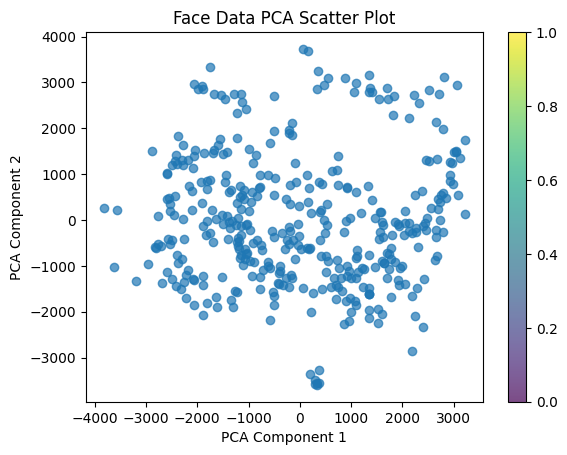

In [36]:
plt.scatter(facematrix_pca[:, 0], facematrix_pca[:, 1], alpha=0.7, cmap='viridis')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Face Data PCA Scatter Plot')
plt.colorbar()
plt.show()

In [37]:
print(facematrix_pca.shape)

(389, 50)


In [39]:
eigenfaces = facematrix_pca[:n_components]
eigenfaces

array([[-1511.48535017+0.j, -1232.86110703+0.j,  1769.97865116+0.j, ...,
          251.5732153 +0.j,   125.69294117+0.j,     5.87542544+0.j],
       [-2597.88183054+0.j, -1127.89904456+0.j,   721.54563853+0.j, ...,
          259.17783366+0.j,   -39.87298856+0.j,  -163.11206295+0.j],
       [-2953.26320132+0.j,  -955.03456257+0.j,  -653.71549028+0.j, ...,
         -264.06537101+0.j,   -84.9869098 +0.j,  -303.60175584+0.j],
       ...,
       [-2819.7815604 +0.j,  -599.43633737+0.j, -1246.23036689+0.j, ...,
          119.62269812+0.j,  -331.90741187+0.j,  -118.01893545+0.j],
       [-2773.10153846+0.j,  -530.49508939+0.j, -1177.284593  +0.j, ...,
           52.43970677+0.j,  -219.93305069+0.j,  -114.67548171+0.j],
       [-2397.93150418+0.j,  -770.26653201+0.j,  -950.44890863+0.j, ...,
          -89.45468355+0.j,   173.72523124+0.j,   262.65269194+0.j]])

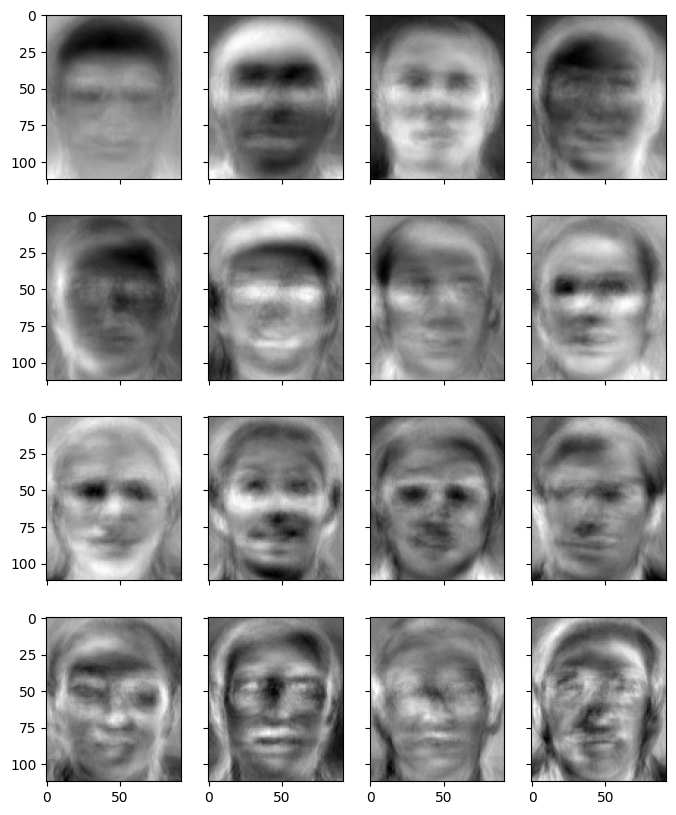

In [43]:
eigenfaces = selected_eigenvectors.T[:16]

fig, axes = plt.subplots(4, 4, sharex=True, sharey=True, figsize=(8, 10))
for i in range(16):
    axes[i//4][i%4].imshow(np.real(eigenfaces[i]).reshape(faceshape), cmap="gray")
plt.show()

In [55]:
weights = eigenfaces @ facematrix_norm.T
print("Shape of the weight matrix:", weights.shape)


Shape of the weight matrix: (16, 389)


In [56]:
# Test on out-of-sample image of existing class
query = faces["s39/10.pgm"].reshape(1, -1)
query_weight = eigenfaces @ (query - mean_face).T
euclidean_distance = np.linalg.norm(weights - query_weight, axis=0)
print(query)
print(query_weight)
print(euclidean_distance)


[[ 89  87  92 ...  93 112 109]]
[[2529.85942814+0.j]
 [2173.88583248+0.j]
 [-513.14588847+0.j]
 [  -5.81348485+0.j]
 [ 577.06763444+0.j]
 [ 747.34283732+0.j]
 [-446.0731332 +0.j]
 [ 526.54399747+0.j]
 [ 209.9647531 +0.j]
 [-225.94723365+0.j]
 [-202.12591862+0.j]
 [ 303.0123198 +0.j]
 [ 377.98620269+0.j]
 [-162.4958735 +0.j]
 [ -90.71677919+0.j]
 [-127.55370416+0.j]]
[5984.22935688 6902.60538827 7170.34306221 6544.91589532 7464.00068965
 7496.85460796 6630.07639253 6270.38625625 7005.7937267  7269.73963024
 4587.40208788 5985.27265377 4881.53367082 4950.93454444 4647.57576651
 5554.00841046 5910.25779671 5690.9966097  5528.58441302 4808.21002318
 4517.34235771 4523.99518538 3934.87531671 4495.88962726 4837.81231758
 4859.62093769 4203.1535395  4986.28443298 5167.77463516 4961.6941985
 6315.87458986 5918.55493991 5486.30688808 5158.09654316 5230.57155617
 5401.41589347 6015.98102214 5478.72516183 6198.40393497 5830.78490203
 5780.73076787 5907.69283595 5830.51017395 6002.38544251 5740.13

In [57]:
best_match = np.argmin(euclidean_distance)
print("Best match %s with Euclidean distance %f" % (facelabel[best_match], euclidean_distance[best_match]))

Best match s39 with Euclidean distance 1175.092483


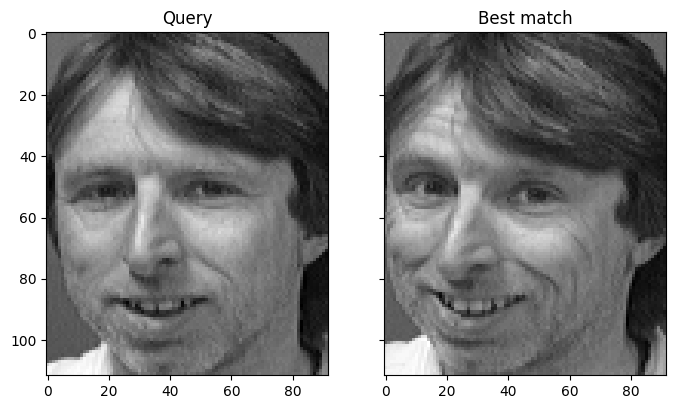

In [58]:
# Visualize
fig, axes = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(8, 6))
axes[0].imshow(query.reshape(faceshape), cmap="gray")
axes[0].set_title("Query")
axes[1].imshow(facematrix[best_match].reshape(faceshape), cmap="gray")
axes[1].set_title("Best match")
plt.show()

Best match s5 with Euclidean distance 2118.253860


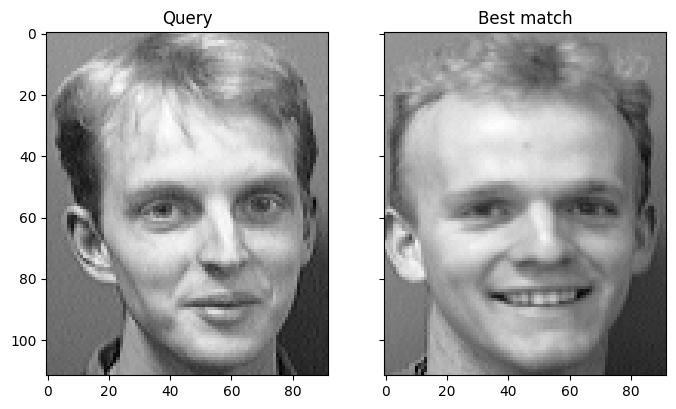

In [59]:
# Test on out-of-sample image of new class
query = faces["s40/1.pgm"].reshape(1, -1)
query_weight = eigenfaces @ (query - mean_face).T
euclidean_distance = np.linalg.norm(weights - query_weight, axis=0)
best_match = np.argmin(euclidean_distance)
print("Best match %s with Euclidean distance %f" % (facelabel[best_match], euclidean_distance[best_match]))

# Visualize
fig, axes = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(8, 6))
axes[0].imshow(query.reshape(faceshape), cmap="gray")
axes[0].set_title("Query")
axes[1].imshow(facematrix[best_match].reshape(faceshape), cmap="gray")
axes[1].set_title("Best match")
plt.show()